# IML Assignment 1

## Name: Ilona Dziurava
## mail: i.dziurava@innopolis.university

## Task 1

### Linear Regression
#### Data reading & plotting

In [ ]:
import pandas as pd
dataset = pd.read_csv('task1_data.csv')
dataset


,X_train,y_train,X_test,y_test
0,0.136018,-0.129555,0.000000,0.000000
1,0.207231,0.894330,0.172414,0.270000
2,0.246135,-0.791176,0.344828,0.535057
3,0.298175,0.180217,0.517241,0.790317
4,0.635941,3.722585,0.689655,1.031108
5,0.944209,0.693082,0.862069,1.253020
6,0.961715,-0.196149,1.034483,1.451991
7,1.089511,1.960637,1.206897,1.624378
8,1.204234,2.063510,1.379310,1.767024
9,2.196011,1.404661,1.551724,1.877318


In [ ]:
#from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = dataset['X_train'], dataset['y_train'], dataset['X_test'], dataset['y_test']

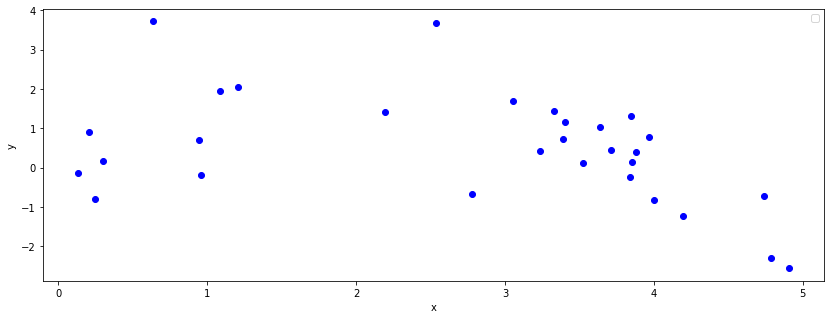

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(X_train, y_train, 'bo')
plt.xlabel("x")
plt.ylabel("y")

plt.legend(loc="best")
plt.show()

#### Linear regression model fitting

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

regressor = LinearRegression()
regressor.fit(np.array(X_train).reshape(-1, 1), y_train)

y_pred_lr = regressor.predict(np.array(X_test).reshape(-1, 1))
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred_lr})
df


,Actual,Predicted
0,0.000000,1.478621
1,0.270000,1.416445
2,0.535057,1.354270
3,0.790317,1.292095
4,1.031108,1.229919
5,1.253020,1.167744
6,1.451991,1.105569
7,1.624378,1.043393
8,1.767024,0.981218
9,1.877318,0.919043


#### Linear regression model prediction & Evaluation


In [ ]:
from sklearn import metrics
import math 

def print_metrics(y_actual, y_pred):
  mse = metrics.mean_squared_error(y_actual, y_pred)
  rmse = math.sqrt(mse)
  mae = metrics.mean_absolute_error(y_actual, y_pred)
  r2 = metrics.r2_score(y_actual, y_pred)
  print('MSE: ', mse)
  print('RMSE: ', rmse)
  print('MAE: ', mae)
  print('R2: ', r2)
  


In [ ]:

print_metrics(y_test, y_pred_lr)

MSE:  0.78105677092199
RMSE:  0.8837741628504365
MAE:  0.7837610302414408
R2:  0.2609450135378707


#### Plotting original data and prediction


<Figure size 1008x360 with 0 Axes>

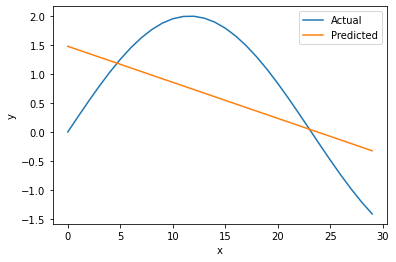

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

df.plot()
plt.xlabel("x")
plt.ylabel("y")

plt.legend(loc="best")
plt.show()

#### Did the linear regression model give a good fit? Elaborate your answer

the linear regression model didn't give a good fit. the predictive model performs poorly on the training data, so our model is underfitting the training data

### Polynomial Regression
#### Constructing the polynomial regression pipeline

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
from numpy.lib import polynomial
pipeline = Pipeline([("polynomial_features", PolynomialFeatures()),
                     ("linear_regression", LinearRegression())
])

#### Tuning the degree hyper-parameter using GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

degrees = list(range(2, 10))
parameters = {'polynomial_features__degree' : degrees}

search = GridSearchCV(estimator = pipeline, param_grid = parameters, cv = 8, scoring = 'neg_mean_squared_error')

x = np.array(X_train).reshape(-1, 1) + np.array(X_test).reshape(-1, 1)
y = y_train + y_test
search.fit(x, y)
print("Best parameter: ", search.best_params_, end = ' ')
print("(CV score=%0.3f)" % search.best_score_)

Best parameter:  {'polynomial_features__degree': 2} (CV score=-1.226)


In [ ]:
y_pred = search.predict(np.array(X_test).reshape(-1, 1))
print_metrics(y_test, y_pred)

MSE:  5.769968378288356
RMSE:  2.402075847738442
MAE:  1.7778216780299956
R2:  -4.459684955639063


#### Manually finding the best degree

In [ ]:
min_score, min_degree = 1e10, 0
for i in range(len(degrees)):
  polynomial_features = PolynomialFeatures(degree=degrees[i])
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                       ("linear_regression", linear_regression)])
  scores = cross_val_score(pipeline, x, y, cv = 8, scoring = 'neg_mean_squared_error')
  mean_scores = np.mean(scores)
  print(mean_scores)
  if min_score < mean_scores or min_score == 1e10:
    min_score, min_degree = mean_scores, degrees[i]
print('Best degree: ', min_degree, end = ' ')
print("(CV score=%0.3f)" % min_score)

-1.2258650382403466
-1.5406853909378015
-4.468356166791317
-12.886909639891124
-48.74819085907906
-296.0306999389886
-529.5089293919535
-1884.9477539658683
Best degree:  2 (CV score=-1.226)


#### Plotting the test data and the best degree polynomial model

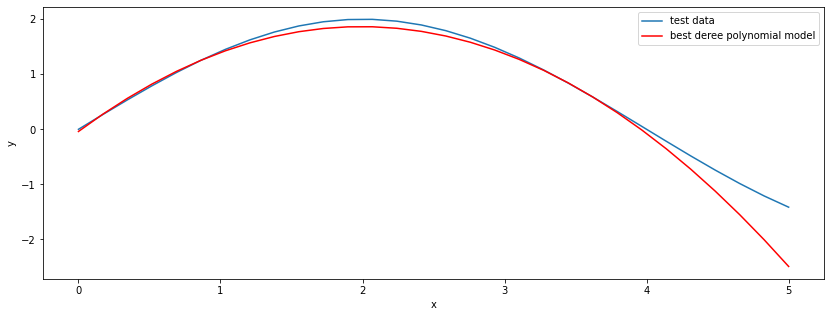

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(X_test, y_test, label="test data")

pipeline = Pipeline([("polynomial_features", PolynomialFeatures(degree = min_degree)),
                     ("linear_regression", LinearRegression())])
pipeline.fit(np.array(X_train).reshape(-1, 1), y_train)
y_pred_bd = pipeline.predict(np.array(X_test).reshape(-1, 1))
plt.plot(X_test, y_pred_bd, color = 'Red', label = 'best deree polynomial model')
plt.xlabel("x")
plt.ylabel("y")

plt.legend(loc="best")
plt.show()

## Task 2

### Data processing
#### Loading the dataset

In [ ]:
import pandas as pd
dataset = pd.read_csv('pokemon_modified.csv')
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

#### Remove the 2 redundant features

In [ ]:
dataset = dataset.drop(['name', 'classification'], axis = 1)
y = dataset.loc[:, 'is_legendary']
X = dataset.drop(['is_legendary'], axis = 1)


there are 3 features that can be removed: name, classification and type1. firstly we can get rid of the name of the pokemon, since it is used to identify the pokemon and have mostly uniq classes. then we remove classification since it has more uniq classes than type1

#### Splitting the data
random_state = 123, use stratify, test_size = 0.2

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123, stratify=y)

Check if the dataset is balanced or not and comment on it

In [ ]:
print('% of legendary samples in train set: ', sum(y_train)/len(y_train))
print('% of legendary samples in test set: ', sum(y_test)/len(y_test))

% of legendary samples in train set:  0.0875
% of legendary samples in test set:  0.08695652173913043


the dataset is not balanced since the number of legendary samples is much less, then the number of non legendary (0.08 vs 99.92)

#### Exploring the dataset and checking for missing values

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

features with missing values: height_m (781), percentage_male(703) and weight_kg (781), since all other features have 801 values

In [ ]:
dataset.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,type1,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0.7,45,88.1,grass,65,65,45,6.9,1,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,1.0,60,88.1,grass,80,80,60,13.0,1,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,2.0,80,88.1,grass,122,120,80,100.0,1,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0.6,39,88.1,fire,60,50,65,8.5,1,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,1.1,58,88.1,fire,80,65,80,19.0,1,0


#### Impute the missing values

In [ ]:
def imput_most_frequent(X, imput):
  #X = pd.DataFrame(imput.fit_transform(X), columns=X.columns)
  X['height_m'] = imput.fit_transform(np.array(X['height_m']).reshape(-1,1))
  X['percentage_male'] = imput.fit_transform(np.array(X['percentage_male']).reshape(-1,1))
  X['weight_kg'] = imput.fit_transform(np.array(X['weight_kg']).reshape(-1,1))
  return X

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(strategy = 'most_frequent')
X_test = imput_most_frequent(X_test, imputer)
X_train = imput_most_frequent(X_train, imputer)
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 564 to 693
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        640 non-null    float64
 1   against_dark       640 non-null    float64
 2   against_dragon     640 non-null    float64
 3   against_electric   640 non-null    float64
 4   against_fairy      640 non-null    float64
 5   against_fight      640 non-null    float64
 6   against_fire       640 non-null    float64
 7   against_flying     640 non-null    float64
 8   against_ghost      640 non-null    float64
 9   against_grass      640 non-null    float64
 10  against_ground     640 non-null    float64
 11  against_ice        640 non-null    float64
 12  against_normal     640 non-null    float64
 13  against_poison     640 non-null    float64
 14  against_psychic    640 non-null    float64
 15  against_rock       640 non-null    float64
 16  against_steel      640 n

#### Double check that there are no missing values

In [ ]:
X_train.isna().sum()

against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
defense              0
experience_growth    0
height_m             0
hp                   0
percentage_male      0
type1                0
sp_attack            0
sp_defense           0
speed                0
weight_kg            0
generation           0
dtype: int64

#### Encode categorically

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [ ]:
import numpy as np
def one_hot_encoder(X, encoder):
  new_f = encoder.fit_transform(np.array(X['type1']).reshape(-1, 1))
  #enc_data = pd.DataFrame(new_f.toarray())

  for i in encoder.categories_:
    X[i] = new_f.toarray()
  X = X.drop(['type1'], axis = 1)
  #new_X = X.join(enc_data)
  
  return X

In [ ]:
X_train = one_hot_encoder(X_train, encoder)
X_test = one_hot_encoder(X_test, encoder)
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 564 to 693
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        640 non-null    float64
 1   against_dark       640 non-null    float64
 2   against_dragon     640 non-null    float64
 3   against_electric   640 non-null    float64
 4   against_fairy      640 non-null    float64
 5   against_fight      640 non-null    float64
 6   against_fire       640 non-null    float64
 7   against_flying     640 non-null    float64
 8   against_ghost      640 non-null    float64
 9   against_grass      640 non-null    float64
 10  against_ground     640 non-null    float64
 11  against_ice        640 non-null    float64
 12  against_normal     640 non-null    float64
 13  against_poison     640 non-null    float64
 14  against_psychic    640 non-null    float64
 15  against_rock       640 non-null    float64
 16  against_steel      640 n

#### Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

x_train

array([[ 0.01643366, -0.14607176,  0.11318907, ..., -0.24770924,
        -0.18418927,  2.45620989],
       [ 0.01643366,  2.04073351,  0.11318907, ..., -0.24770924,
        -0.18418927, -0.40713133],
       [ 0.01643366, -0.14607176,  0.11318907, ..., -0.24770924,
        -0.18418927, -0.40713133],
       ...,
       [ 0.01643366, -0.14607176,  0.11318907, ..., -0.24770924,
        -0.18418927, -0.40713133],
       [ 0.01643366, -0.14607176,  0.11318907, ..., -0.24770924,
        -0.18418927, -0.40713133],
       [ 0.01643366, -0.14607176,  0.11318907, ..., -0.24770924,
        -0.18418927, -0.40713133]])

#### Confusion Matrix

Are there highly co-related features in the dataset? Is it a problem?

<Figure size 2160x2160 with 0 Axes>

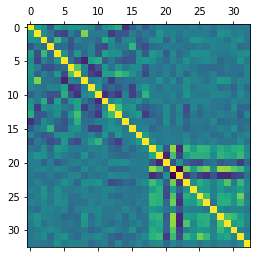

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))
plt.matshow(X.corr())
plt.show()


some features are highly correleted (for example base-total and attack). correlated data means we should work harder to make the handling of data technically simpler and more effective

### Model fitting and Comparison

#### Tuning LR model

In [ ]:
from sklearn import metrics
# caclulate and print metrics
def print_clf_metrics( y_actual, y_pred ):
  print("accuracy: ", metrics.accuracy_score(y_actual, y_pred))
  print("precision: ", metrics.precision_score(y_actual, y_pred))
  print("recall: ", metrics.recall_score(y_actual, y_pred))
  print("f1-score: ", metrics.f1_score(y_actual, y_pred))


In [ ]:
parameters = { 
    'penalty': ['l1', 'l2'], 'C': np.logspace(-3, 3, 7), 'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

max_iter=1000 in LR constructor

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(max_iter = 1000)
gs_clf = GridSearchCV(estimator = lr, param_grid = parameters)

In [ ]:
gs_clf.fit(x_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver 

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [ ]:
print("Tuned Hyperparameters :", gs_clf.best_params_)
print("Accuracy :", gs_clf.best_score_)

Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.9875


#### Construct a LR with the best params and Evaluate the LR with the best params

In [ ]:
lr_clf = gs_clf.best_estimator_

In [ ]:
lr_clf.fit(x_train, y_train)
y_pred = lr_clf.predict(x_test)

In [ ]:
print_clf_metrics(y_test, y_pred)

accuracy:  0.9937888198757764
precision:  0.9333333333333333
recall:  1.0
f1-score:  0.9655172413793104


#### Print the top 5 most influencing features and the top 5 ignored features

In [ ]:
coefficient = sorted(list(zip(abs(lr_clf.coef_).tolist()[0], X_train.columns)))
print("5 most influencing features: ", coefficient[-5:])
print("5 ignored features: ", coefficient[:5])

5 most influencing features:  [(0.7098763035115829, 'speed'), (1.1378376470052152, 'experience_growth'), (1.176247958988524, 'capture_rate'), (1.3544916985194602, 'normal'), (2.1396743447033457, 'base_egg_steps')]
5 ignored features:  [(0.009159633219979011, 'against_flying'), (0.012007818091801882, 'dragon'), (0.02553559045644688, 'against_grass'), (0.02747127502994823, 'against_normal'), (0.040515298988426346, 'against_psychic')]


#### Tuning KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier()
param_grid = {
    'n_neighbors': list(range(1, 15)), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'cosine']
}

grid_search_clf = GridSearchCV(estimator = knn1, param_grid = param_grid)

grid_search_clf.fit(x_train, y_train)

print("Tuned Hyperparameters :", grid_search_clf.best_params_)
print("Accuracy :", grid_search_clf.best_score_)

Tuned Hyperparameters : {'metric': 'cosine', 'n_neighbors': 4, 'weights': 'distance'}
Accuracy : 0.9515625


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [ ]:
knn = grid_search_clf.best_estimator_
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)
print_clf_metrics(y_test, y_predict)


accuracy:  0.9813664596273292
precision:  1.0
recall:  0.7857142857142857
f1-score:  0.88


#### Fitting GNB to the data and evaluating on the test dataset

In [ ]:
from sklearn.naive_bayes import GaussianNB

gauss_nb = GaussianNB()
gauss_nb.fit(x_train, y_train)
y_pred = gauss_nb.predict(x_test)

print_clf_metrics(y_test, y_pred)

accuracy:  0.9316770186335404
precision:  0.56
recall:  1.0
f1-score:  0.717948717948718


#### Which metric is most appropriate for this task and why?

since our dataset is imbalanced, the most appropriate metric is f1-score as this is a good all-around metric which balances precision and recall whilst also performing well on imbalanced datasets

#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.
What is the best model for this task? and based on what
did you pick it?

as the best metric for our task is f1-score, the best model will be a LR model, as it has the highest f1-score (0.993), as well as the highest accuracy and precision

## Bonus Task

#### Loading the Dataset

In [2]:
import pandas as pd
train_data = pd.read_csv('bonus_train.csv')

test_data = pd.read_csv('bonus_test.csv')

train_data

,var1,var2,var3,target
0,63.973548,2.726496,379.882305,2
1,10.906092,5.529845,207.272945,1
2,73.482382,2.739803,335.491727,1
3,28.937856,3.666386,226.279807,0
4,33.315477,5.540084,159.608987,0
...,...,...,...,...
265,87.227771,3.738061,320.135382,2
266,-4.605994,3.688628,204.136303,1
267,44.178216,5.085936,198.365089,0
268,6.169277,3.328219,204.934675,0


In [3]:
y_train = train_data.loc[:, 'target']
X_train = train_data.drop(['target'], axis = 1)

y_test = test_data.loc[:, 'target']
X_test = test_data.drop(['target'], axis = 1)

print(X_train, y_train, X_test, y_test)

          var1      var2        var3
0    63.973548  2.726496  379.882305
1    10.906092  5.529845  207.272945
2    73.482382  2.739803  335.491727
3    28.937856  3.666386  226.279807
4    33.315477  5.540084  159.608987
..         ...       ...         ...
265  87.227771  3.738061  320.135382
266  -4.605994  3.688628  204.136303
267  44.178216  5.085936  198.365089
268   6.169277  3.328219  204.934675
269  -5.396278  4.021390  197.347533

[270 rows x 3 columns] 0      2
1      1
2      1
3      0
4      0
      ..
265    2
266    1
267    0
268    0
269    0
Name: target, Length: 270, dtype: int64           var1      var2        var3
0    26.052523  4.698298  239.765969
1    62.205061  4.373559  207.581273
2    11.390621  4.494386  244.578095
3    35.320556  2.731171  322.284266
4    53.508643  3.575985  247.902236
5    15.608017  3.441529  171.143617
6    34.033739  3.653252  216.465744
7    -2.157290  5.066110  123.714108
8    26.441097  3.839241  195.244416
9   -11.806370  3.91032

####  Plot the data using the pairplot in sns

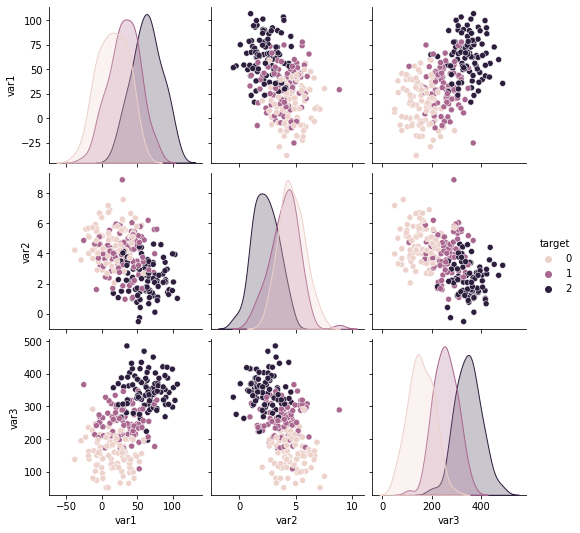

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(train_data, hue="target", kind="scatter")


#### Fit LR to the training dataset using OVR and evaluate on the test dataset

In [5]:
from sklearn.linear_model import LogisticRegression
multi_lr = LogisticRegression(multi_class = 'ovr')
multi_lr.fit(X_train, y_train)
y_pred = multi_lr.predict(X_test)


In [6]:
from sklearn import metrics
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))

accuracy:  0.8


#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [7]:
multi_lr = LogisticRegression(multi_class = 'multinomial', max_iter = 1000)
multi_lr.fit(X_train, y_train)
y_pred = multi_lr.predict(X_test)

In [8]:
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))

accuracy:  0.9


#### Using gridsearch to tune the C value and multi class

In [9]:
import numpy as np
params = {
    'C': np.logspace(-10, 10, 7), 'multi_class': ['multinomial', 'ovr']
}

In [10]:
from sklearn.model_selection import GridSearchCV
grid_search_clf = GridSearchCV(estimator = LogisticRegression(max_iter = 1000), param_grid = params)

grid_search_clf.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-10, 2.15443469e-07, 4.64158883e-04, 1.00000000e+00,
       2.15443469e+03, 4.64158883e+06, 1.00000000e+10]),
                         'multi_class': ['multinomial', 'ovr']})

In [11]:
from pandas._libs.tslibs.period import get_period_field_arr
print("Tuned Hyperparameters :", grid_search_clf.best_params_)
print("Accuracy :", grid_search_clf.best_score_)

Tuned Hyperparameters : {'C': 2154.4346900318865, 'multi_class': 'multinomial'}
Accuracy : 0.825925925925926


In [12]:
grid_search_clf.best_estimator_

LogisticRegression(C=2154.4346900318865, max_iter=1000,
                   multi_class='multinomial')

#### Comment on why one multi_class technique was better than the other

multinomial technique is better than ovr since it has a higher accuracy score. it is used when the dependent variable has more than two levels and they cannot be ordered. unlike one-vs-rest that splits it into one binary dataset for each class, the multinomial approach splits the dataset into one dataset for each class versus every other class

#### Create LR with the best params

In [13]:
multi_lr = grid_search_clf.best_estimator_

#### Visualize the decision boundaries

In [14]:
%pip install -q -U mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.6 MB/s eta 0:00:00


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


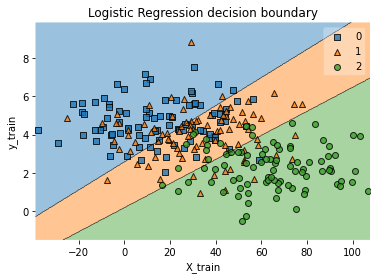

In [16]:
from mlxtend.plotting import plot_decision_regions
multi_lr.fit(X_train[['var1', 'var2']], y_train)
plot_decision_regions(X=np.array(X_train[['var1', 'var2']]), y=np.array(y_train), clf = multi_lr)

plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('Logistic Regression decision boundary')
plt.show()

#### Comment on the decision boundary, do you think this is a good model or not? and based on what?

i think that this model is not really good since we can observe instances of different classes on each boundary (and we can see instances of all classes on the orange part of decision boundary)